# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [33]:
df.head(50)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.5240,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.5240,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.5240,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.5240,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.5380,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.5380,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [8]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


initial thoughts:
no  missing data- good
all the data is either a float or int- makes it easy to work with

variables- the higher the better:
zn?
chas?
rm
medv

variables- the lower the better:
crim
indus?
nox
age
dis
tax
ptratio
lstat


lstat

In [21]:
df.lstat.mean(), df.lstat.median(), df.lstat.mode()

(12.515435435435437, 10.97, 0    18.13
 dtype: float64)

In [20]:
df.lstat.std(), df.lstat.var()

(7.067780803585785, 49.95352548753573)

In [30]:
df.lstat.quantile(.75) - df.lstat.quantile(.25)

9.240000000000002

indus

In [28]:
df.indus.mean(), df.indus.median(), df.indus.mode()

(11.293483483483483, 9.9, 0    18.1
 dtype: float64)

In [31]:
df.indus.std(), df.indus.var()

(6.998123104477312, 48.97372698541916)

In [32]:
df.indus.quantile(.75) - df.indus.quantile(.25)

12.970000000000002

rad

In [34]:
df.rad.mean(), df.rad.median(), df.rad.mode()

(9.633633633633634, 5.0, 0    24
 dtype: int64)

In [35]:
df.rad.std(), df.rad.var()

(8.742174349631062, 76.42561235934728)

In [38]:
df.rad.quantile(.75) - df.rad.quantile(.25)

20.0

In [39]:
df.rad.value_counts()

24    88
5     76
4     70
3     27
8     18
2     14
1     14
7     13
6     13
Name: rad, dtype: int64

In [83]:
rad24data_set = df[df['rad'] == 24]
rad24dataset_inv = df[df['rad'] != 24]
rad24data_set.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,88.000000,88.000000,88.0,8.800000e+01,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.0,8.800000e+01,88.000000,88.000000,88.000000
mean,425.715909,11.616404,0.0,1.810000e+01,0.056818,0.673875,5.922068,89.013636,2.134557,24.0,666.0,2.020000e+01,300.627386,18.358523,17.056818
std,40.093554,10.559032,0.0,3.573073e-15,0.232822,0.062266,0.687750,13.428766,0.634788,0.0,0.0,3.573073e-15,139.083412,6.928403,8.937443
min,357.000000,2.378570,0.0,1.810000e+01,0.000000,0.532000,3.561000,40.300000,1.129600,24.0,666.0,2.020000e+01,3.500000,2.960000,5.000000
25%,389.500000,5.404117,0.0,1.810000e+01,0.000000,0.631000,5.597250,84.225000,1.655525,24.0,666.0,2.020000e+01,251.552500,13.827500,11.650000
50%,431.000000,8.529685,0.0,1.810000e+01,0.000000,0.693000,6.113000,94.100000,2.034150,24.0,666.0,2.020000e+01,379.040000,17.665000,15.300000
75%,461.250000,13.620000,0.0,1.810000e+01,0.000000,0.713000,6.383750,98.725000,2.523725,24.0,666.0,2.020000e+01,396.382500,22.775000,20.300000
max,488.000000,73.534100,0.0,1.810000e+01,1.000000,0.770000,7.393000,100.000000,4.098300,24.0,666.0,2.020000e+01,396.900000,37.970000,50.000000


In [60]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


I chose to take a data subset for where the rad (accessibility to the highways) value was 24.  Since this data is an index instead of an actual measurable value I wanted to look more into it.  I was intrigued when I did a value_counts for this column and saw the values were just 1-9 and then all of a sudden it jumped to 24.  Combined with that the 24 value had the most counts!  So I thought to myself this 24 index must be a group of houses that were super close to the highway.  So I thought it would be interesting to view all of the other column information for this subset of houses to see what else it said about this area.

Usually people don't like to live super close to highways because it tends to be loud and crowded.  But at the same time it is convenient for travel and these areas I would think would tend to be Metropolitan which can be good.  So I wanted to see how those factors weighed against each other when you look at the medv data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC507CCB38>],
      dtype=object)

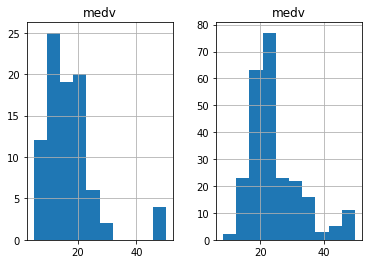

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2)





rad24data_set.hist('medv', ax=axes[0])
rad24dataset_inv.hist('medv', ax=axes[1])

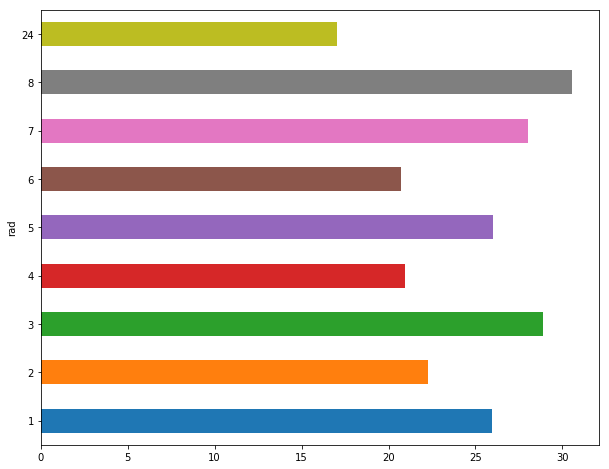

In [93]:
to_plot = df.groupby('rad').medv.mean()
to_plot.plot(kind='barh', figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC4FB911D0>]],
      dtype=object)

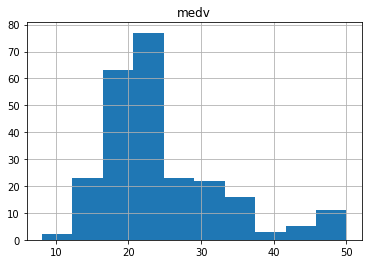

In [87]:
rad24dataset_inv.hist("medv")

In [98]:
lowtax_df = df[df['tax'] < 300]
lowtaxdf_inv = df[df['tax'] >= 300]
lowtax_df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,192.354545,0.131452,18.054545,6.610364,0.063636,0.485745,6.512545,53.522727,4.544046,3.809091,250.554545,17.644545,391.716909,8.994000,27.146364
std,119.935502,0.163409,27.576112,5.651544,0.245221,0.063813,0.627137,24.550269,1.813150,1.633904,32.721955,2.011006,8.904695,5.006119,8.078817
min,1.000000,0.006320,0.000000,1.210000,0.000000,0.385000,5.404000,6.500000,1.757200,1.000000,188.000000,13.000000,341.600000,1.980000,11.900000
25%,85.250000,0.043682,0.000000,3.330000,0.000000,0.442900,6.030000,33.225000,3.094025,3.000000,224.000000,16.600000,391.037500,5.650000,22.050000
50%,185.500000,0.066530,0.000000,4.905000,0.000000,0.472000,6.415500,52.400000,4.428100,4.000000,255.000000,17.950000,394.675000,7.865000,24.400000
75%,283.750000,0.150115,25.000000,6.960000,0.000000,0.510000,6.974000,71.525000,5.713025,5.000000,277.000000,19.000000,396.900000,10.390000,32.050000
max,506.000000,0.825260,100.000000,25.650000,1.000000,0.647000,8.398000,97.000000,9.222900,8.000000,296.000000,21.000000,396.900000,29.550000,50.000000


I chose to take another subset of data for where property taxes were "low". I chose to use the cutoff of 300 as it seemed to be about 1/3 of the data set. I was wondering if there would be correlation between this and the value of the houses in this area (medv).  Some people are very wary of taxes and possibly might only live somewhere with low property tax.  Thinking about wealthy people, sometimes these are the most influential people, maybe they even have the power to lower the property taxes in their neighborhood which would contribute to a negative relationship (-tax/+medv)

I thought I might see (but wasn't sure, of course) a higher home value (medv) where the property taxes were low and that does seem to be the case for this dataset

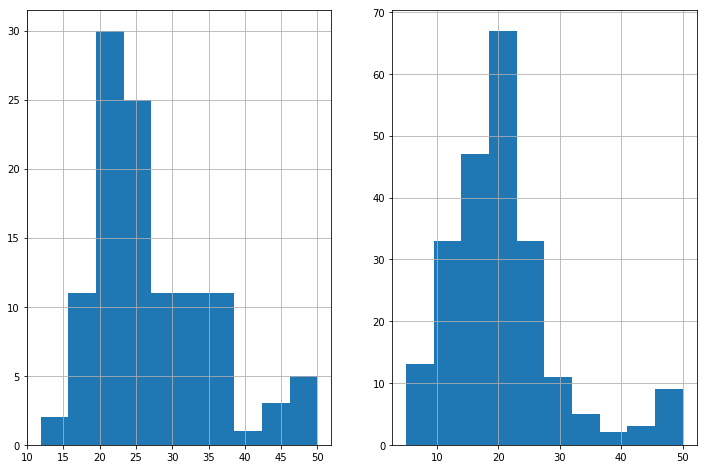

In [100]:

taxfig = plt.figure(figsize=(12,8))
ax3 = taxfig.add_subplot(121)
ax4 = taxfig.add_subplot(122)


lowtax_df.medv.hist(ax=ax3)
lowtaxdf_inv.medv.hist(ax=ax4)

In [63]:
df.zn.value_counts()

0.0      248
20.0      14
25.0       7
80.0       7
22.0       7
12.5       6
45.0       5
30.0       3
90.0       3
95.0       3
60.0       3
33.0       3
55.0       3
75.0       3
34.0       3
21.0       3
40.0       2
28.0       2
85.0       2
35.0       1
100.0      1
17.5       1
82.5       1
52.5       1
18.0       1
Name: zn, dtype: int64

In [108]:
zonegreaterthanzero = df[df['zn'] > 0]
zonegreaterthanzero_inv = df[df['zn'] == 0]
zonegreaterthanzero.medv.describe()

count    85.000000
mean     28.438824
std       8.094723
min      15.000000
25%      22.900000
50%      26.200000
75%      33.000000
max      50.000000
Name: medv, dtype: float64

In [101]:
zonegreaterthanzero = df[df['zn'] > 80]
zonegreaterthanzero.medv.describe()

count    10.000000
mean     35.250000
std      10.656792
min      23.100000
25%      26.425000
50%      32.550000
75%      45.225000
max      50.000000
Name: medv, dtype: float64

I wanted to use the value zn to make a subset.  It's a very strange data set because about 3/4 of it's values are 0 so I wanted to see if that 1/4 of values had an interesting story to tell about the data

To me, the zn variable, was trying to say whether that house was in an area that allowed for big houses.  A value of 0 for zn meant to me that this was probably in the middle of the city where there are usually small places to live.  Wealthier people tend to want to live a small way out from the city so they can have bigger homes and a little bit of land for space. But a counterpoint would be that some of the nicest most expensive neighborhoods in the world are directly downtown and have smaller places to live so that they can get all the benefits from being right in the middle of the city.

So I wanted to see what the difference was for the data of zn greater than 0.  

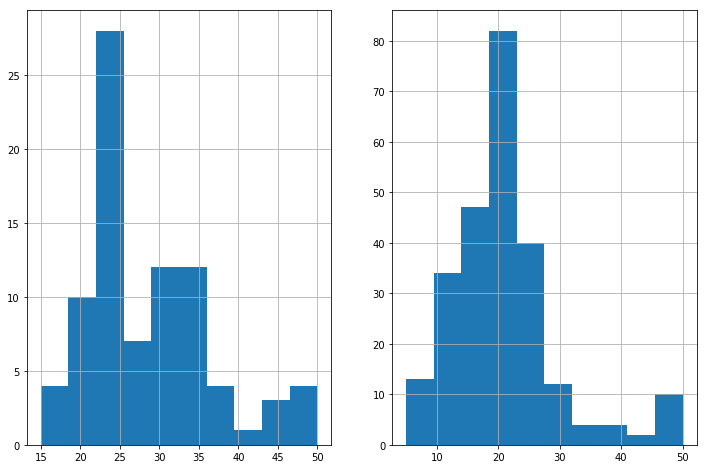

In [111]:

znfig = plt.figure(figsize=(12,8))
ax5 = znfig.add_subplot(121)
ax6 = znfig.add_subplot(122)

zonegreaterthanzero.medv.hist(ax=ax5)
zonegreaterthanzero_inv.medv.hist(ax=ax6)

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!